In [1]:
import quaccatoo.pulsed_logic as pl
import quaccatoo.pulsed_experiments as pe
import quaccatoo.visualization as vis
from quaccatoo.analysis import fit_rabi, fit_hahn_mod
from qutip import tensor, qeye, sigmax, sigmay, sigmaz, jmat, fock_dm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
B0 = 239
theta = 2.1

#Zero-Field Splitting
Hzf = 2.87e3*tensor(jmat(1,'z')**2- (jmat(1,'x')**2 + jmat(1,'y')**2 + jmat(1,'z')**2)/3, qeye(2))

#Hyperfine Coupling
Hhf = 3.03*tensor(jmat(1,'z'), jmat(1/2,'z')) + 3.65*(tensor(jmat(1,'x'), jmat(1/2,'x')) + tensor(jmat(1,'y'), jmat(1/2,'y')))

#Electron Zeeman
Hez = 28025e-4*B0*tensor(np.cos(theta*np.pi/180)*jmat(1,'z') + np.sin(theta*np.pi/180)*jmat(1,'x'), qeye(2))

#15N Nuclear Zeeman Interaction
Hnz = 4.316e-4*B0*tensor(qeye(3), np.cos(theta*np.pi/180)*jmat(1/2,'z') + np.sin(theta*np.pi/180)*jmat(1/2,'x'))

#Total time independent hamiltonian
H0 = Hzf + Hez + Hhf + Hnz
w1 = 25.64744239

H1 = w1*tensor(jmat(1,'x'), qeye(2))
w_pulse = (H0.eigenstates()[0][3] + H0.eigenstates()[0][2] -H0.eigenstates()[0][1] -H0.eigenstates()[0][0] )/2
t= np.linspace(0, .06, 1000)

(array([0.49625111, 0.05496624, 0.50330358]),
 array([[ 2.92553311e-08,  1.32361775e-11, -2.25529723e-09],
        [ 1.32361775e-11,  3.36861827e-11,  2.29163535e-10],
        [-2.25529723e-09,  2.29163535e-10,  1.71668769e-08]]))

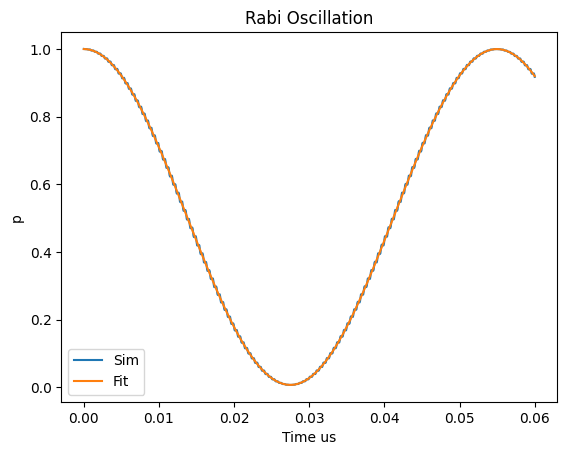

In [5]:
rabi = pe.sim_rabi(t=t, H0=H0, H1=H1,  w_pulse=w_pulse, rho0=tensor(fock_dm(3,1), qeye(2)), observable= tensor(fock_dm(3,1), qeye(2)).unit() )
vis.plot_rabi(rabi, t, fit_function=fit_rabi, fit_guess=[.5, .05, .5])

(array([ 3.94299334e+02,  2.47167456e-01, -3.93303996e+02,  1.21585655e-01,
         2.92976876e+00]),
 array([[ 1.32093369e+24, -4.43180870e+07, -1.32093369e+24,
          3.58305528e+07,  5.12394631e+06],
        [-4.43180870e+07,  8.02640662e-07,  4.43180870e+07,
          1.38512780e-08,  4.03431583e-10],
        [-1.32093369e+24,  4.43180870e+07,  1.32093369e+24,
         -3.58305527e+07, -5.12394631e+06],
        [ 3.58305528e+07,  1.38512780e-08, -3.58305527e+07,
          3.02511832e-08,  3.82151979e-10],
        [ 5.12394631e+06,  4.03431583e-10, -5.12394631e+06,
          3.82151979e-10,  2.71289618e-08]]))

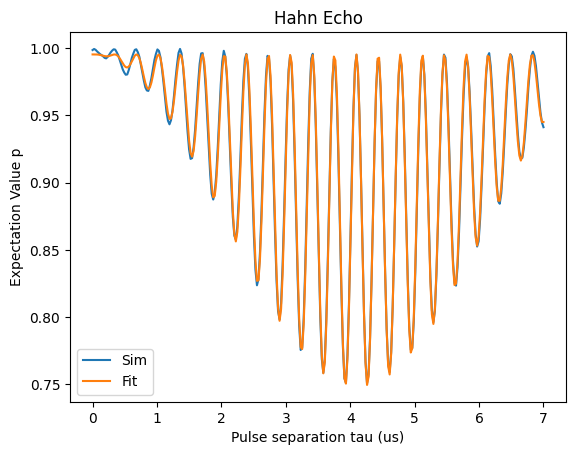

In [3]:
tau = np.linspace(0, 7, 300)
hahn = pe.sim_hahn(tau, H0, H1, w_pulse=w_pulse, t_pi=0.05496616/2, rho0=tensor(fock_dm(3,1), qeye(2)).unit(), observable= tensor(fock_dm(3,1), qeye(2)) )
vis.plot_hahn(hahn, tau, fit_function=fit_hahn_mod, fit_guess=[0.06158196, 0.24058842, 0.0247981, .1, 3])

In [4]:
tau = np.linspace(0, .5, 300)
XY8 = pe.sim_XY8(tau, H0, H1, w_pulse=w_pulse, M = 2, t_pi=0.05496616/2, rho0=tensor(fock_dm(3,1), qeye(2)).unit(), observable= tensor(fock_dm(3,1), qeye(2)) )

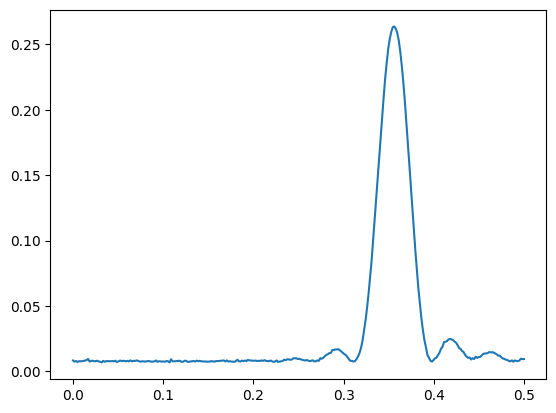

In [5]:
plt.plot(tau, XY8 )